# Notebook for Testing Regression
Codes

## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
from datetime import timedelta
from scipy import stats
from getpass import getpass
import os
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import statsmodels.api as sm
from matplotlib.pyplot import figure

# Dataset

In [2]:
%reload_ext sql

In [3]:
%%sql df << 
select *
from ad_hoc.daniel_cluster_practice


12360 rows affected.
Returning data to local variable df


In [4]:
df = df.DataFrame().sample(1000)
df.head()

,days_since_registration,session_count,crm_session_count,jdp_visits,application_start_count,signup_marketing_source
1669,0,1,0,1,1,facebook
5474,0,7,0,6,1,search
5087,0,1,0,2,0,linkedin_jobslot_all
7940,0,3,0,10,3,jobboerse
2360,0,2,0,9,3,ebay-kleinanzeigen


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1669 to 10442
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   days_since_registration  1000 non-null   int64 
 1   session_count            1000 non-null   int64 
 2   crm_session_count        1000 non-null   int64 
 3   jdp_visits               1000 non-null   int64 
 4   application_start_count  1000 non-null   int64 
 5   signup_marketing_source  971 non-null    object
dtypes: int64(5), object(1)
memory usage: 54.7+ KB


## Checking Correlations

<Axes: >

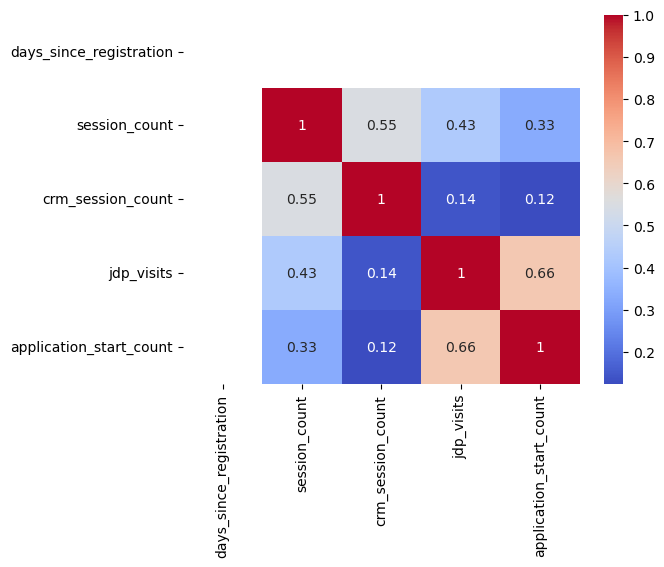

In [6]:
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


/tmp/ipykernel_19227/3362859107.py:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



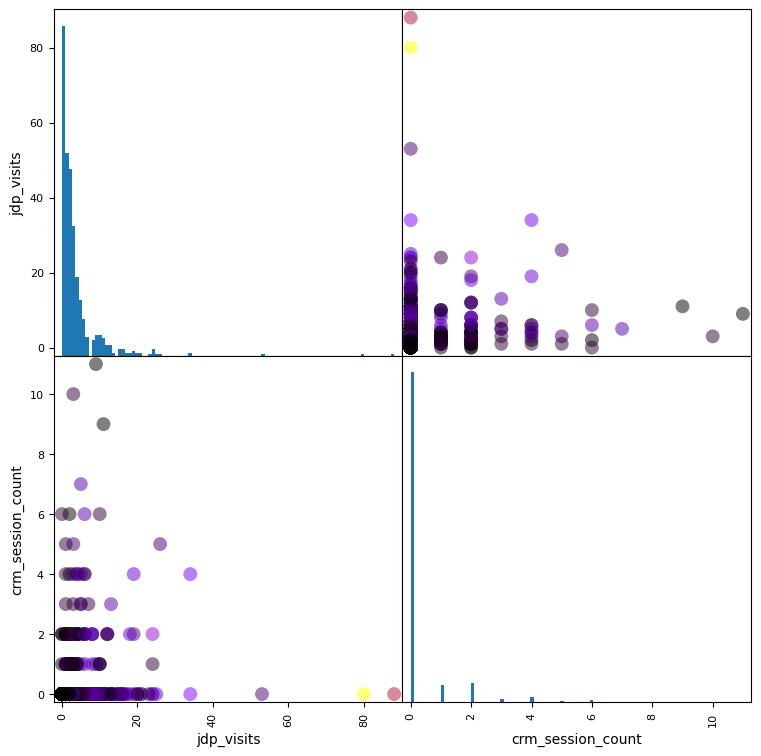

In [7]:
# plotting a scatter matrix
from matplotlib import cm

X = df[['jdp_visits', 'crm_session_count']]
y = df['application_start_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=100, hist_kwds={'bins':100}, figsize=(9,9), cmap=cmap)

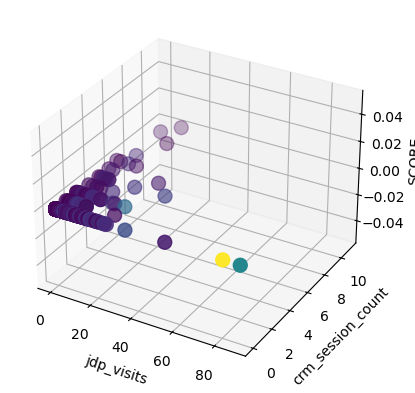

In [8]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['jdp_visits'], X_train['crm_session_count'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('jdp_visits')
ax.set_ylabel('crm_session_count')
ax.set_zlabel('SCORE')
plt.show()

## KNeighbors

In [9]:
# For this example, we use the mass, width, and height features of each fruit instance
X = numerical_df[['jdp_visits']]
y = numerical_df['application_start_count']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 11)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [12]:
knn.score(X_test, y_test)

0.364

In [19]:
knn.score(X_train, y_train)

0.52

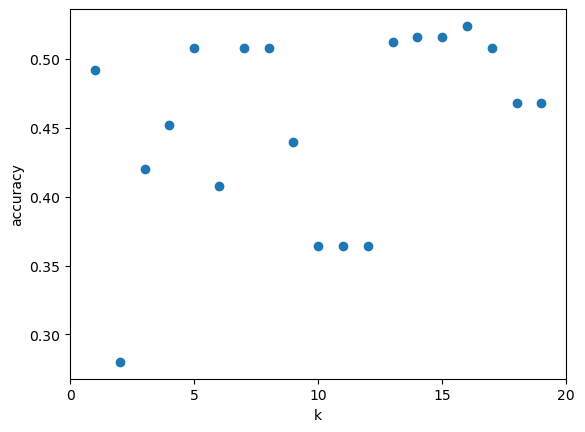

In [13]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

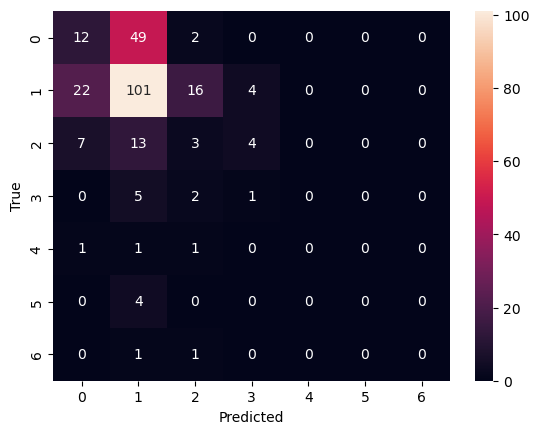

              precision    recall  f1-score   support

           0       0.29      0.19      0.23        63
           1       0.58      0.71      0.64       143
           2       0.12      0.11      0.12        27
           3       0.11      0.12      0.12         8
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2

    accuracy                           0.47       250
   macro avg       0.16      0.16      0.16       250
weighted avg       0.42      0.47      0.44       250



/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [14]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

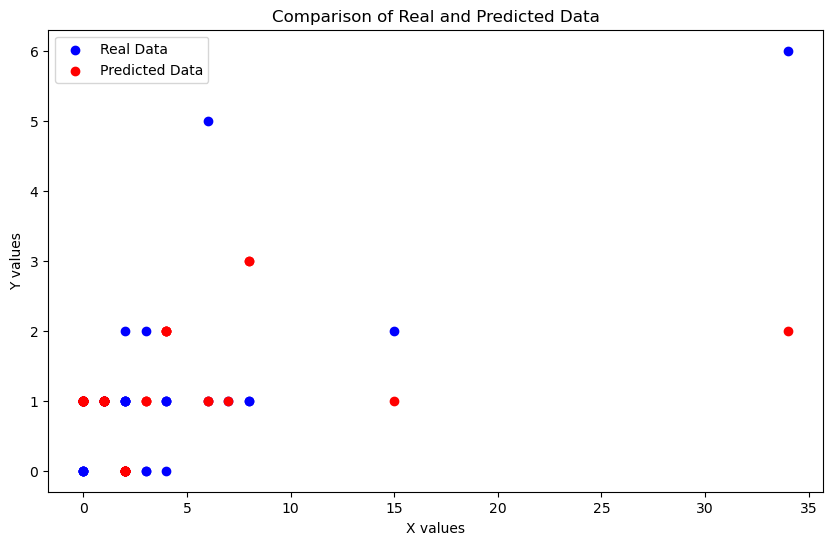

In [15]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test[0::5], y_test[0::5], color='blue', label='Real Data')  # Plot the real data
plt.scatter(X_test[0::5], y_pred[0::5], color='red', label='Predicted Data')  # Plot the predicted data
plt.title('Comparison of Real and Predicted Data')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()

## Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=155)  # n_neighbors can be adjusted

# Fit the model using the training data
knn_regressor.fit(X_train, y_train)

In [ ]:
# Predicting the values for the test set
y_pred = knn_regressor.predict(X_test)

# Evaluating the model using mean squared error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print('R-squared test score: {:.3f}'
     .format(knn_regressor.score(X_test, y_test)))

In [ ]:
k_range = range(1,150)
scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,50,150]);

In [ ]:
# Assuming the KNeighborsRegressor model, knn_regressor, has already been trained

# Predicting the values for the training set
y_train_pred = knn_regressor.predict(X_train)

# Plotting the actual vs predicted values for the training data
plt.figure(figsize=(10, 6))

# Scatter plot for actual values, in blue
plt.scatter(range(len(y_train)), y_train, color='blue', alpha=0.5, label='Actual')

# Scatter plot for predicted values, in red
plt.scatter(range(len(y_train_pred)), y_train_pred, color='red', alpha=0.5, label='Predicted')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values for Training Data')
plt.legend()

# # Limiting the x and y axis to maximum 10
# plt.xlim(0, 10)
# plt.ylim(0, 10)

plt.show()

In [ ]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X[0::5], y[0::5],
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


## Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

X = numerical_df[['jdp_visits']]
y = numerical_df['application_start_count']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [0.15413382]
linear model intercept (b): 0.622
R-squared score (training): 0.464
R-squared score (test): 0.242


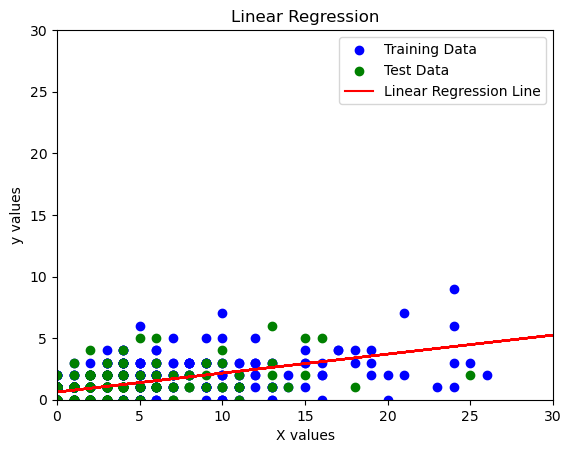

In [18]:
import matplotlib.pyplot as plt

# Scatter plot for training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Scatter plot for testing data
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Line plot for the regression line
# Since this is a simple linear regression, the line equation is y = mx + c
plt.plot(X_train, linreg.coef_ * X_train + linreg.intercept_, color='red', label='Linear Regression Line')

# Adding labels and title
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Linear Regression')

# Adding legend
plt.legend()

# Limiting the x and y axis to maximum 10
plt.xlim(0, 30)
plt.ylim(0, 30)

# Show plot
plt.show()


## Ridge Regression


In [23]:
from sklearn.linear_model import Ridge

X = numerical_df[['jdp_visits']]
y = numerical_df['application_start_count']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

linridge = Ridge(alpha=5.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 0.6221475366178433
ridge regression linear model coeff:
[0.15410919]
R-squared score (training): 0.464
R-squared score (test): 0.242
Number of non-zero features: 1


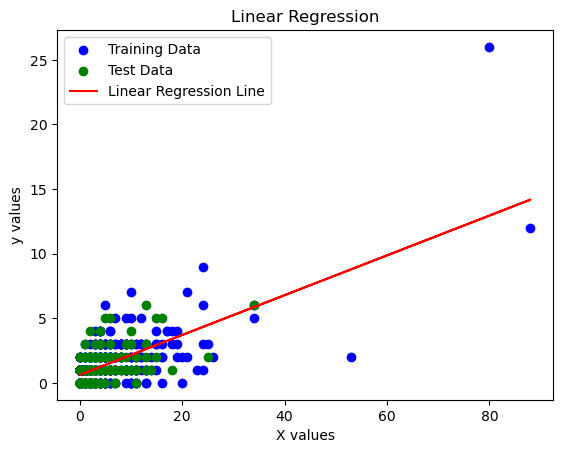

In [24]:
import matplotlib.pyplot as plt

# Scatter plot for training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Scatter plot for testing data
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Line plot for the regression line
# Since this is a simple linear regression, the line equation is y = mx + c
plt.plot(X_train, linridge.coef_ * X_train + linridge.intercept_, color='red', label='Linear Regression Line')

# Adding labels and title
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Linear Regression')

# Adding legend
plt.legend()

# Show plot
plt.show()


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = numerical_df[['jdp_visits']]
y = numerical_df['application_start_count']

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=5.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 0.9232768307780213
ridge regression linear model coeff:
[6.06178459]
R-squared score (training): 0.322
R-squared score (test): 0.201
Number of non-zero features: 1


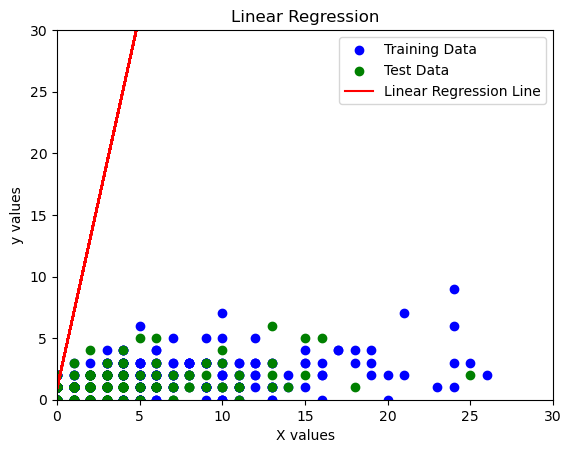

In [44]:
import matplotlib.pyplot as plt

# Scatter plot for training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Scatter plot for testing data
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Line plot for the regression line
# Since this is a simple linear regression, the line equation is y = mx + c
plt.plot(X_train, linridge.coef_ * X_train + linridge.intercept_, color='red', label='Linear Regression Line')

# Adding labels and title
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Linear Regression')

# Adding legend
plt.legend()


# Limiting the x and y axis to maximum 10
plt.xlim(0, 30)
plt.ylim(0, 30)
# Show plot
plt.show()


In [48]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = numerical_df[['jdp_visits']]
y = numerical_df['application_start_count']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=1.0, max_iter = 100).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1.1666666666666667
lasso regression linear model coeff:
[0.]
Non-zero features: 0
R-squared score (training): 0.000
R-squared score (test): -0.011

Features with non-zero weight (sorted by absolute magnitude):


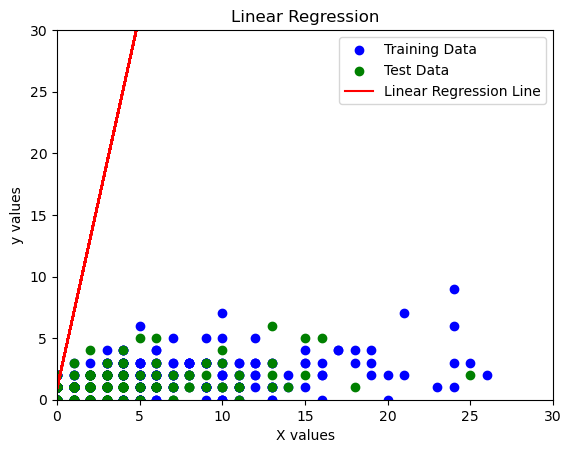

In [49]:
import matplotlib.pyplot as plt

# Scatter plot for training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Scatter plot for testing data
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Line plot for the regression line
# Since this is a simple linear regression, the line equation is y = mx + c
plt.plot(X_train, linridge.coef_ * X_train + linridge.intercept_, color='red', label='Linear Regression Line')

# Adding labels and title
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Linear Regression')

# Adding legend
plt.legend()


# Limiting the x and y axis to maximum 10
plt.xlim(0, 30)
plt.ylim(0, 30)
# Show plot
plt.show()


In [46]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 1.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 2.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 3.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 5.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 10.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 20.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 50.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01



## Polynimial Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [0.15413382]
linear model intercept (b): 0.622
R-squared score (training): 0.464
R-squared score (test): 0.242

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[0.         0.09976754 0.00107681]
(poly deg 2) linear model intercept (b): 0.756
(poly deg 2) R-squared score (training): 0.489
(poly deg 2) R-squared score (test): 0.256


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(poly deg 2 + ridge) linear model coeff (w):
[0.         0.09975706 0.00107695]
(poly deg 2 + ridge) linear model intercept (b): 0.756
(poly deg 2 + ridge) R-squared score (training): 0.489
(poly deg 2 + ridge) R-squared score (test): 0.256


# Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
filtered_df = numerical_df[numerical_df['jdp_visits'] < 5]


X = filtered_df[['jdp_visits']]
y = filtered_df['application_start_count']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

clf = LogisticRegression(C=1000, penalty=None, solver ='saga').fit(X_train, y_train)


print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.58
Accuracy of Logistic regression classifier on test set: 0.65


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



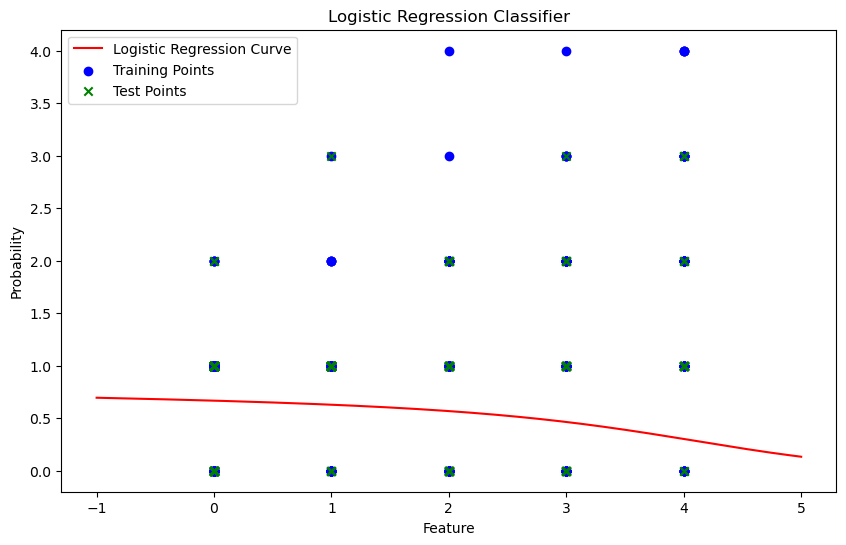

In [84]:
# Function to plot
def plot_logistic_regression(X_train, y_train, X_test, y_test, clf):
    # Adjust indexing if X is a DataFrame
    if isinstance(X, pd.DataFrame):
        x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    else:
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    grid = np.linspace(x_min, x_max, 300)

    # Predict probabilities on the grid
    probs = clf.predict_proba(grid.reshape(-1, 1))[:, 1]

    plt.figure(figsize=(10, 6))

    # Plot logistic regression curve
    plt.plot(grid, probs, label="Logistic Regression Curve", color='red')

    # Scatter plot of actual training points
    plt.scatter(X_train, y_train, marker='o', label="Training Points", color='blue')

    # Scatter plot of actual test points
    plt.scatter(X_test, y_test, marker='x', label="Test Points", color='green')

    plt.xlabel("Feature")
    plt.ylabel("Probability")
    plt.title("Logistic Regression Classifier")
    plt.legend()
    plt.show()

# Run the function
plot_logistic_regression(X_train, y_train, X_test, y_test, clf)

## SVM 

In [100]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc,accuracy_score, confusion_matrix, classification_report


In [103]:
X = filtered_df[['jdp_visits']]
y = filtered_df['application_start_count']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

In [104]:
clf = SVC(kernel = 'linear', C=1.0).fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.58
Accuracy of Logistic regression classifier on test set: 0.65


In [105]:
# Step 5: Predict the labels for the test set
y_pred = clf.predict(X_test)

# Step 6: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.6515151515151515
Confusion Matrix:
[[  0  48   0   0]
 [  0 129   0   0]
 [  0  16   0   0]
 [  0   5   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.65      1.00      0.79       129
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         5

    accuracy                           0.65       198
   macro avg       0.16      0.25      0.20       198
weighted avg       0.42      0.65      0.51       198



/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



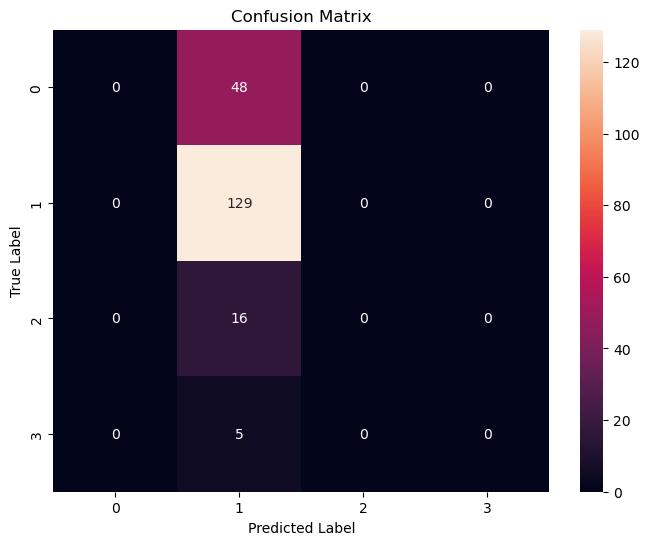

In [106]:
# Assuming y_test and y_pred are already defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

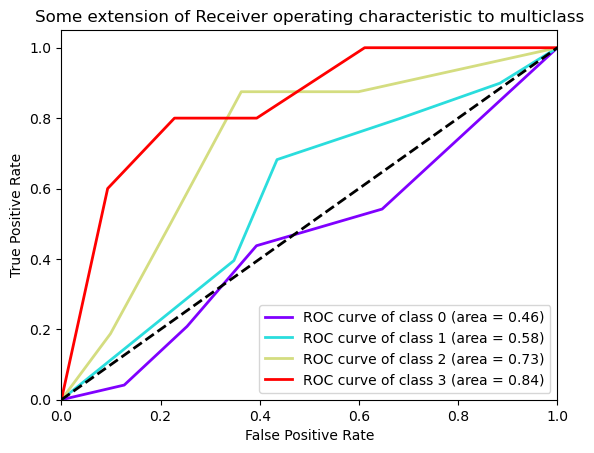

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output labels if they're not already
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

# Train a OneVsRestClassifier using the SVC classifier
ovr_clf = OneVsRestClassifier(SVC(kernel='linear', C=10.0, probability=True))
ovr_clf.fit(X_train, y_train)

# Get the prediction scores
y_score = ovr_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()

colors = iter(plt.cm.rainbow(np.linspace(0, 1, n_classes)))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multiclass')
plt.legend(loc="lower right")
plt.show()